In [2]:
# se importan librerías
import numpy as np
import matplotlib.pyplot as plt
import camb
from scipy.integrate import quad
#import SciencePlots

ModuleNotFoundError: No module named 'SciencePlots'

In [8]:
# constantes cosmológicas a ocupar
H0 = 67.4 
omega_m = 0.315
omega_ch2 = 0.120
omega_bh2 = 0.0224
tau = 0.054

# se crean parámetros
pars = camb.CAMBparams()

pars.set_cosmology(H0=H0, ombh2=omega_bh2, omch2=omega_ch2, tau=tau)

#se generan soluciones dado este set de parámetros
#results = camb.get_results(pars)

class: <CAMBparams>
 WantCls = True
 WantTransfer = False
 WantScalars = True
 WantTensors = False
 WantVectors = False
 WantDerivedParameters = True
 Want_cl_2D_array = True
 Want_CMB = True
 Want_CMB_lensing = True
 DoLensing = True
 NonLinear = NonLinear_none
 Transfer: <TransferParams>
   high_precision = False
   accurate_massive_neutrinos = False
   kmax = 0.9
   k_per_logint = 0
   PK_num_redshifts = 1
   PK_redshifts = [0.0]
 want_zstar = False
 want_zdrag = False
 min_l = 2
 max_l = 2500
 max_l_tensor = 600
 max_eta_k = 5000.0
 max_eta_k_tensor = 1200.0
 ombh2 = 0.0224
 omch2 = 0.12
 omk = 0.0
 omnuh2 = 0.000644866570625114
 H0 = 67.4
 TCMB = 2.7255
 YHe = 0.24586829360147697
 num_nu_massless = 2.0293333333333337
 num_nu_massive = 1
 nu_mass_eigenstates = 1
 share_delta_neff = False
 nu_mass_degeneracies = [1.0146666666666666]
 nu_mass_fractions = [1.0]
 nu_mass_numbers = [1]
 InitPower: <InitialPowerLaw>
   tensor_parameterization = tensor_param_rpivot
   ns = 0.96
   nrun = 

In [9]:
z = np.linspace(0, 10, 100)

pars.set_matter_power(z)

results = camb.get_results(pars)

Note: redshifts have been re-sorted (earliest first)


In [11]:
print('Power spectrum at z=0.5, k/h=0.1/Mpc is %s (Mpc/h)^3 '%(power_spectrum.P(0.5, 0.1)))

Power spectrum at z=0.5, k/h=0.1/Mpc is 3122.3089293281323 (Mpc/h)^3 


In [10]:
kh, z1, PK = results.get_linear_matter_power_spectrum(hubble_units=True,
                                                      k_hunit=True)

In [39]:
khnon, znon, PKnon = results.get_linear_matter_power_spectrum(hubble_units=True,
                                                      k_hunit=True, nonlinear=True)

In [15]:
PK[100,:]

array([4.76760120e+01, 5.24351857e+01, 5.76694476e+01, 6.34262056e+01,
       6.97576006e+01, 7.67210051e+01, 8.43794764e+01, 9.28023950e+01,
       1.02066111e+02, 1.12254462e+02, 1.23459735e+02, 1.35783426e+02,
       1.49337170e+02, 1.64243638e+02, 1.80637748e+02, 1.98667995e+02,
       2.18497447e+02, 2.40305509e+02, 2.64289424e+02, 2.90666141e+02,
       3.19673814e+02, 3.51574534e+02, 3.86656170e+02, 4.25235063e+02,
       4.67658632e+02, 5.14308689e+02, 5.65604191e+02, 6.22004738e+02,
       6.84015220e+02, 7.52188752e+02, 8.27131483e+02, 9.09507113e+02,
       1.00004173e+03, 1.09952875e+03, 1.20883426e+03, 1.32890195e+03,
       1.46075894e+03, 1.60552027e+03, 1.76439442e+03, 1.93868738e+03,
       2.12980691e+03, 2.33926629e+03, 2.56868494e+03, 2.81979048e+03,
       3.09441514e+03, 3.39449157e+03, 3.72204174e+03, 4.07915956e+03,
       4.46799280e+03, 4.89070214e+03, 5.34943666e+03, 5.84627964e+03,
       6.38319021e+03, 6.96193557e+03, 7.58400633e+03, 8.25054073e+03,
      

In [21]:
pk = PK[99,200]

In [29]:
len(z1)

100

In [38]:
z1[99]

np.float64(10.0)

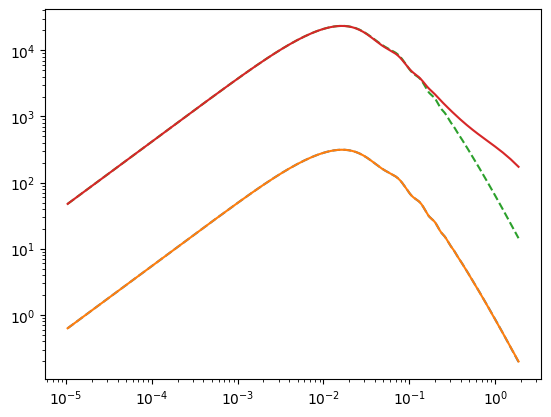

In [44]:

# para este redshift en 99 plotea
plt.loglog(kh, PK[99,:], linestyle = 'dashed')
plt.loglog(khnon, PKnon[99, :])
plt.loglog(kh, PK[0,:], linestyle = 'dashed')
plt.loglog(khnon, PKnon[0, :])

In [60]:
powers = results.get_cmb_power_spectra(pars, CMB_unit='muK')

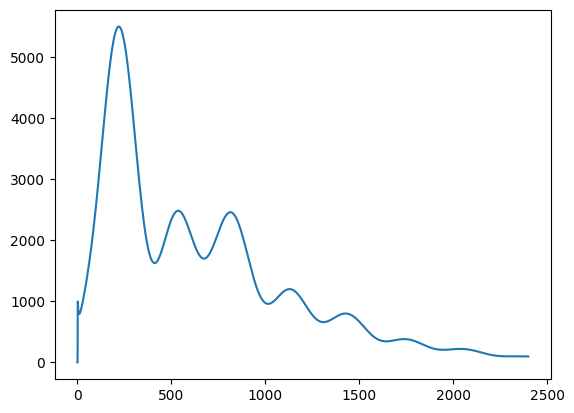

In [63]:
unlesedCL = powers['unlensed_total']
ells = np.arange(unlesedCL[:,1].shape[0])

plt.plot(ells, unlesedCL[:,0])

In [58]:
plt.figure(ells, unlesedCL[:,0])

TypeError: only length-1 arrays can be converted to Python scalars

In [55]:
ells

array([   0,    1,    2, ..., 2398, 2399, 2400])

In [57]:
unlesedCL[:,0]

array([0.00000000e+00, 0.00000000e+00, 1.34274705e-10, ...,
       1.32200211e-11, 1.31935213e-11, 1.31664561e-11])